In [1]:
import os, inspect, sys
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [18]:
import pandas as pd

data = pd.read_csv('../datasets/jurisprudencias_stj.csv', index_col=0)
data

,jurisprudencia_index,tema,processo,relator,orgao,data_julgamento,data_publicacao,ementa
0,0,1) A falta de defesa técnica por advogado no p...,Processo\nAgRg no AREsp 331607 / SP\nAGRAVO RE...,Relator(a)\nMinistro HERMAN BENJAMIN (1132),Órgão Julgador\nT2 - SEGUNDA TURMA,Data do Julgamento\n15/08/2013,Data da Publicação/Fonte\nDJe 16/09/2013,Ementa\nPROCESSUAL CIVIL. AGRAVO REGIMENTAL. A...
1,0,1) A falta de defesa técnica por advogado no p...,Processo\nRMS 31995 / RS\nRECURSO ORDINÁRIO EM...,Relator(a)\nMinistro SÉRGIO KUKINA (1155),Órgão Julgador\nT1 - PRIMEIRA TURMA,Data do Julgamento\n15/08/2013,Data da Publicação/Fonte\nDJe 26/08/2013,Ementa\nRECURSO ORDINÁRIO EM MANDADO DE SEGURA...
2,0,1) A falta de defesa técnica por advogado no p...,Processo\nRMS 32169 / RN\nRECURSO ORDINÁRIO EM...,Relator(a)\nMinistro HUMBERTO MARTINS (1130),Órgão Julgador\nT2 - SEGUNDA TURMA,Data do Julgamento\n02/05/2013,Data da Publicação/Fonte\nDJe 17/06/2013,Ementa\nPROCESSUAL CIVIL E ADMINISTRATIVO. MAN...
3,0,1) A falta de defesa técnica por advogado no p...,Processo\nAgRg no REsp 1256653 / SP\nAGRAVO RE...,Relator(a)\nMinistro BENEDITO GONÇALVES (1142),Órgão Julgador\nT1 - PRIMEIRA TURMA,Data do Julgamento\n28/08/2012,Data da Publicação/Fonte\nDJe 05/09/2012,Ementa\nPROCESSUAL CIVIL E ADMINISTRATIVO. AGR...
4,0,1) A falta de defesa técnica por advogado no p...,Processo\nMS 15313 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n09/11/2011,Data da Publicação/Fonte\nDJe 18/11/2011,Ementa\nADMINISTRATIVO. MANDADO DE SEGURANÇA. ...
...,...,...,...,...,...,...,...,...
1049,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 15271 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro GURGEL DE FARIA (1160),Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n13/05/2020,Data da Publicação/Fonte\nDJe 29/05/2020,Ementa\nADMINISTRATIVO. SERVIDOR PÚBLICO. PROC...
1050,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 17807 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistra REGINA HELENA COSTA (1157),Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n11/12/2019,Data da Publicação/Fonte\nDJe 13/12/2019,Ementa\nDIREITO ADMINISTRATIVO. MANDADO DE SEG...
1051,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 23464 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n11/12/2019,Data da Publicação/Fonte\nDJe 13/12/2019,Ementa\nPROCESSUAL CIVIL. ADMINISTRATIVO. MAND...
1052,234,9) Os prazos prescricionais previstos no art. ...,Processo\nMS 22617 / DF\nMANDADO DE SEGURANÇA\...,Relator(a)\nMinistro NAPOLEÃO NUNES MAIA FILHO...,Órgão Julgador\nS1 - PRIMEIRA SEÇÃO,Data do Julgamento\n27/11/2019,Data da Publicação/Fonte\nDJe 03/12/2019,Ementa\nMANDADO DE SEGURANÇA. PROCESSO ADMINIS...


In [24]:
v = data[['jurisprudencia_index']]
custom_data = data[v.replace(v.apply(pd.Series.value_counts)).gt(2).all(1)]

In [47]:
import numpy as np

group_count = []
grouped_df = custom_data.groupby('jurisprudencia_index')
for key, item in grouped_df:
    jurisprudencia_group = grouped_df.get_group(key)
    group_count.append(len(jurisprudencia_group))
#     print(jurisprudencia_group, "\n\n")
print(np.median(group_count))
print(np.mean(group_count))

5.0
5.157068062827225


In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(custom_data, test_size=0.2, stratify=custom_data.jurisprudencia_index, random_state=42)

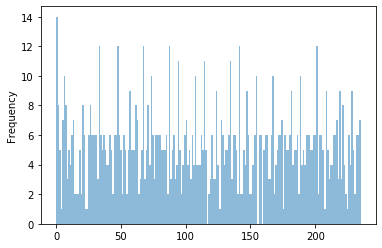

In [35]:
data.jurisprudencia_index.plot.hist(bins=200, alpha=0.5)

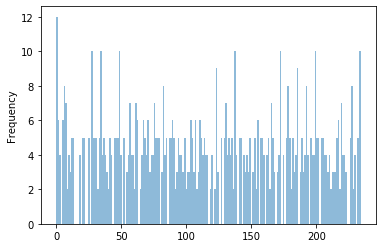

In [40]:
train.jurisprudencia_index.plot.hist(bins=200, alpha=0.5)